# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/customer-segmentation/Train.csv')
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


- ID	Unique ID
- Gender	Gender of the customer
- Ever_Married	Marital status of the customer
- Age	Age of the customer
- Graduated	Is the customer a graduate?
- Profession	Profession of the customer
- Work_Experience	Work Experience in years
- Spending_Score	Spending score of the customer
- Family_Size	Number of family members for the customer (including the customer)
- Var_1	Anonymised Category for the customer
- Segmentation	(target) Customer Segment of the customer

# Data Cleaning

In [3]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [4]:
df.duplicated().sum()
# no duplicates

0

In [5]:
df.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

<Axes: >

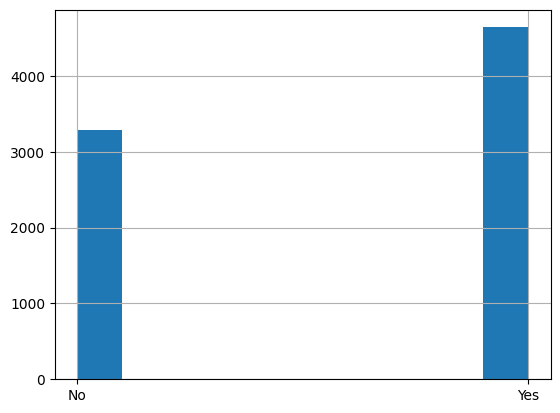

In [6]:
df['Ever_Married'].hist()

In [7]:
df['Ever_Married'].fillna(method='ffill',inplace=True)

In [8]:
df.isna().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

Work_Experience
1.0     2354
0.0     2318
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: count, dtype: int64


<Axes: xlabel='Work_Experience', ylabel='Count'>

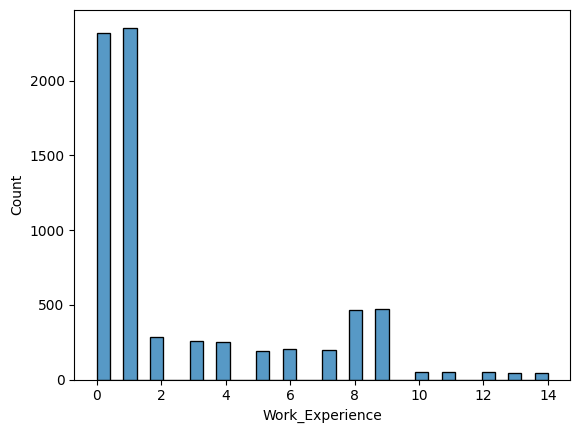

In [9]:
print(df['Work_Experience'].value_counts())
sns.histplot(data=df,x='Work_Experience')

In [10]:
#filling the missing Work_Experience data
df['Work_Experience'] = df['Work_Experience'].fillna(method='ffill')

In [11]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [12]:
df.isna().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated           78
Profession         124
Work_Experience      0
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

Text(0.5, 1.0, 'Profession Distribution')

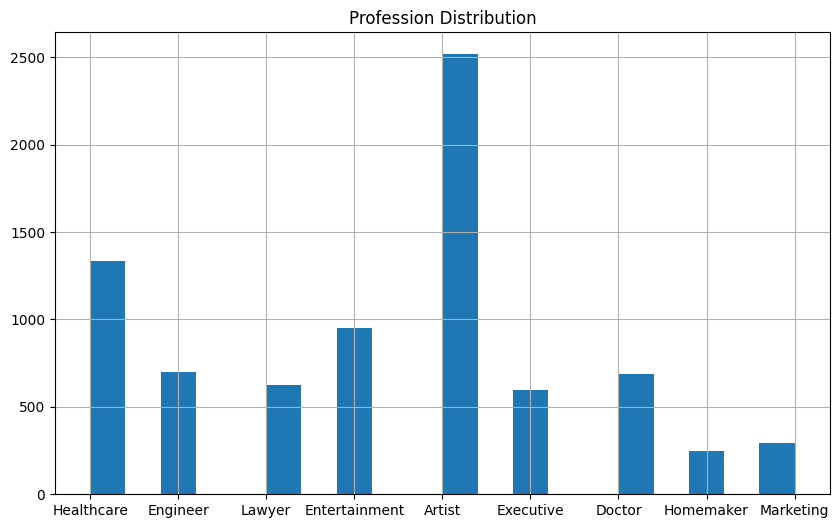

In [13]:
plt.figure(figsize=(10,6))
df['Profession'].hist(bins=20)
plt.title('Profession Distribution')

Text(0.5, 1.0, 'Graduated Distribution')

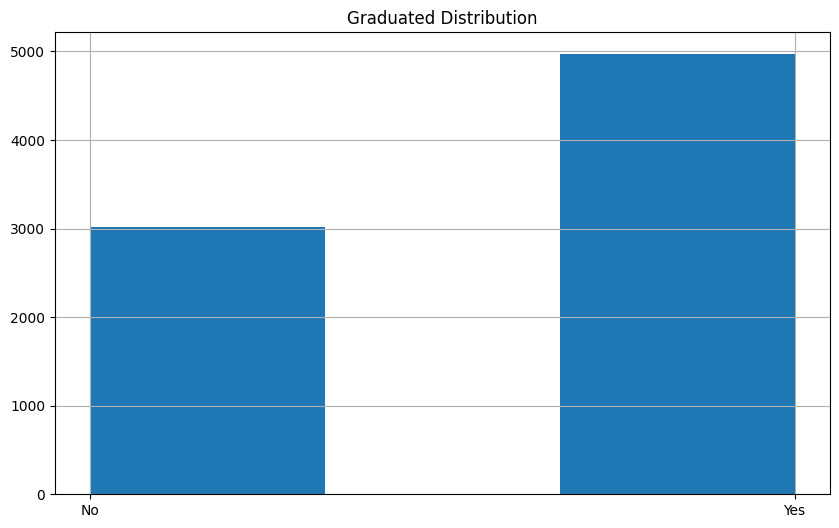

In [14]:
plt.figure(figsize=(10,6))
df['Graduated'].hist(bins=3)
plt.title('Graduated Distribution')

Text(0.5, 1.0, 'Family Size Distribution')

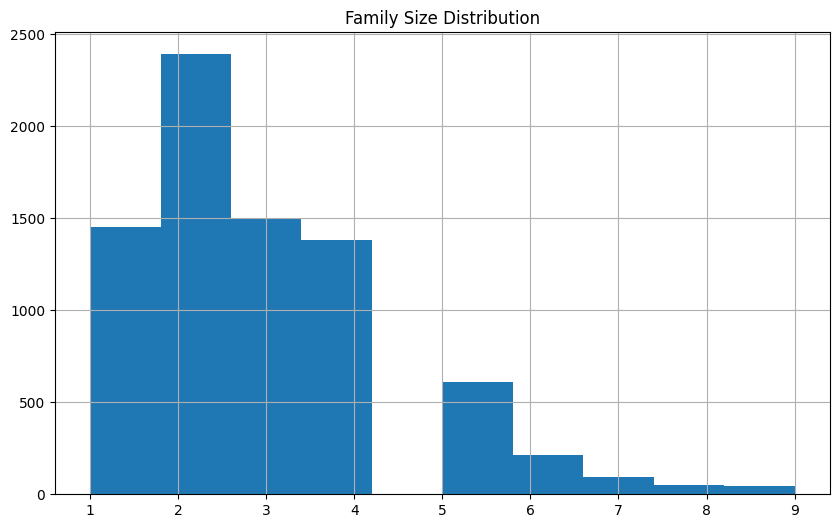

In [15]:
plt.figure(figsize=(10,6))
df['Family_Size'].hist(bins=10)
plt.title('Family Size Distribution')

Text(0.5, 1.0, 'Anonymous Variable Distribution')

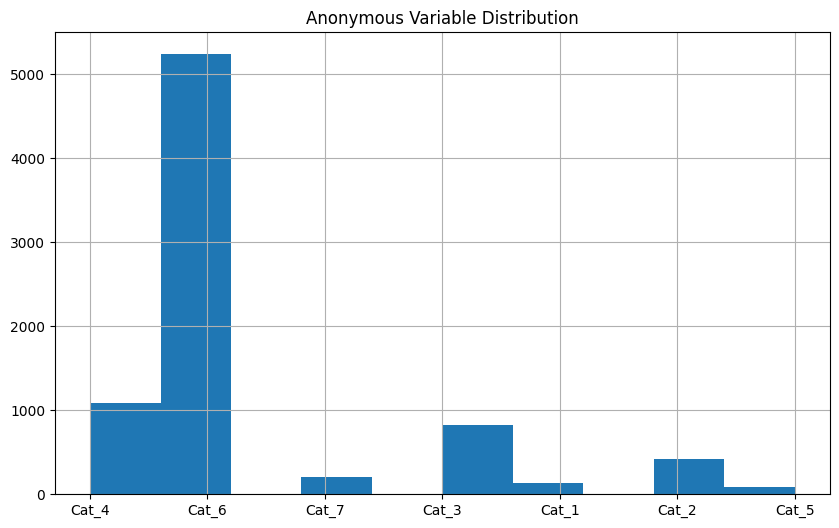

In [16]:
plt.figure(figsize=(10,6))
df['Var_1'].hist(bins=10)
plt.title('Anonymous Variable Distribution')

In [17]:
#filling the missing data for married, profession, family size and var 1
df['Var_1'] = df['Var_1'].fillna(method='ffill')
df['Family_Size'] = df['Family_Size'].fillna(method='ffill')
df['Graduated'] = df['Graduated'].fillna(method='ffill')
df['Profession'] = df['Profession'].fillna(method='ffill')

In [18]:
#df.drop('Graduted',inplace=True,axis=1)

In [19]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,Cat_6,A


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   object 
 5   Profession       8068 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      8068 non-null   float64
 9   Var_1            8068 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


There are no more null instance in the dataframe. However, the data type of the features are not the same. Three can be spotted right now: float, int and object. The next section will deal with the different datatypes.

# Data Preprocessing
`Data can be categorical or numerical. Not all machine learning algorithms can handle categorical data as inputs. Artificial Neural Networks can only take numerical data as inputs. Therefore, it is a good thing to do to turn the data into numerical data.`

In [21]:
df['Gender'].value_counts()

Gender
Male      4417
Female    3651
Name: count, dtype: int64

In [22]:
# Change gender to numeric data
def change_gender(gender):
    if gender == 'Male':
        return 1
    else:
        return 0
df['Gender'] = df['Gender'].apply(change_gender)

In [23]:
categorical_features = ['Ever_Married','Graduated','Profession','Spending_score','Var_1']
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,0,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,466315,0,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,1,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,0,Yes,40,Yes,Entertainment,0.0,High,6.0,Cat_6,A


In [24]:
print(df['Ever_Married'].value_counts(),'\n', df['Graduated'].value_counts())

Ever_Married
Yes    4722
No     3346
Name: count, dtype: int64 
 Graduated
Yes    5021
No     3047
Name: count, dtype: int64


In [25]:
# change married and graduated data into numeric using lambda function
for i in categorical_features[0:2]:
    df[i] = df[i].apply(lambda x: 1 if x=='Yes' else 0)
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,0,1,38,1,Engineer,1.0,Average,3.0,Cat_4,A
2,466315,0,1,67,1,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,1,1,67,1,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,0,1,40,1,Entertainment,0.0,High,6.0,Cat_6,A


In [26]:
# Label encoder on Profession feature
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
y = le.fit_transform(df['Profession'])
df['Profession'] = y
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.0,Low,4.0,Cat_4,D
1,462643,0,1,38,1,2,1.0,Average,3.0,Cat_4,A
2,466315,0,1,67,1,2,1.0,Low,1.0,Cat_6,B
3,461735,1,1,67,1,7,0.0,High,2.0,Cat_6,B
4,462669,0,1,40,1,3,0.0,High,6.0,Cat_6,A


In [27]:
# label encoder for spending score and Var_1
categorical_features = ['Ever_Married','Graduated','Profession','Spending_Score','Var_1']
for i in categorical_features[-2:]:
    le = LabelEncoder()
    y = le.fit_transform(df[i])
    df[i] = y
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.0,2,4.0,3,D
1,462643,0,1,38,1,2,1.0,0,3.0,3,A
2,466315,0,1,67,1,2,1.0,2,1.0,5,B
3,461735,1,1,67,1,7,0.0,1,2.0,5,B
4,462669,0,1,40,1,3,0.0,1,6.0,5,A


In [28]:
df.drop('ID',inplace=True,axis=1)

In [29]:
df.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
count,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000
mean,0.547471,0.585275,43.466906,0.622335,2.792390,2.618741,1.359941,2.846678,4.138572
std,0.497772,0.492705,16.711696,0.484833,2.540883,3.394284,0.848418,1.530377,1.425436
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000
50%,1.000000,1.000000,40.000000,1.000000,3.000000,1.000000,2.000000,3.000000,5.000000
75%,1.000000,1.000000,53.000000,1.000000,5.000000,4.000000,2.000000,4.000000,5.000000
max,1.000000,1.000000,89.000000,1.000000,8.000000,14.000000,2.000000,9.000000,6.000000


## Splitting Data

Why split data into traing and test: Google [article](https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data)

In [30]:
from sklearn.model_selection import train_test_split

X = df.drop('Segmentation',axis=1)
y = df['Segmentation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((6454, 9), (6454,), (1614, 9), (1614,))

## Normalization
* Article by google on types of normalization: [link](https://developers.google.com/machine-learning/data-prep/transform/normalization)

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((6454, 9), (6454,), (1614, 9), (1614,))

# Training Machine Learning Models

In [32]:
from sklearn.linear_model import LogisticRegression # still classificication
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
# Sklearn models: https://scikit-learn.org/stable/supervised_learning.html

In [33]:
# Make prediction using 5 machine learning models
dt = DecisionTreeClassifier()
svc = SVC()
knn = KNeighborsClassifier()
nb = GaussianNB()
lr = LogisticRegression()
models = [dt,svc,knn,nb,lr]

preds = [[],[],[],[],[]]

for i,model in enumerate(models):
    model.fit(X_train,y_train)
    preds[i] = model.predict(X_test)
preds
    

[array(['B', 'B', 'D', ..., 'C', 'D', 'B'], dtype=object),
 array(['D', 'B', 'D', ..., 'C', 'D', 'D'], dtype=object),
 array(['B', 'B', 'D', ..., 'C', 'D', 'B'], dtype=object),
 array(['D', 'C', 'D', ..., 'C', 'D', 'D'], dtype='<U1'),
 array(['D', 'C', 'D', ..., 'C', 'D', 'D'], dtype=object)]

# Evaluating the models
* Google's article on evaluation metrics: [link](https://cloud.google.com/vertex-ai/docs/tabular-data/classification-regression/evaluate-model)

In [34]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [35]:
def evaluate_model(predictions,name):
    print('Model: ',name)
    print(classification_report(y_test,predictions))
    cm = confusion_matrix(y_test,predictions)
    disp   = ConfusionMatrixDisplay(cm)
    disp.plot()
    na = 'Conf'
    plt.title('Confusion Matrix for '+ name)
    
    

Model:  DecisionTreeClassifier
              precision    recall  f1-score   support

           A       0.34      0.36      0.35       391
           B       0.31      0.33      0.32       369
           C       0.46      0.45      0.45       380
           D       0.61      0.56      0.58       474

    accuracy                           0.43      1614
   macro avg       0.43      0.42      0.43      1614
weighted avg       0.44      0.43      0.44      1614

Model:  SVC
              precision    recall  f1-score   support

           A       0.39      0.48      0.43       391
           B       0.45      0.28      0.34       369
           C       0.50      0.54      0.52       380
           D       0.65      0.68      0.67       474

    accuracy                           0.51      1614
   macro avg       0.50      0.49      0.49      1614
weighted avg       0.51      0.51      0.50      1614

Model:  KNeighborsClassifier
              precision    recall  f1-score   support

   

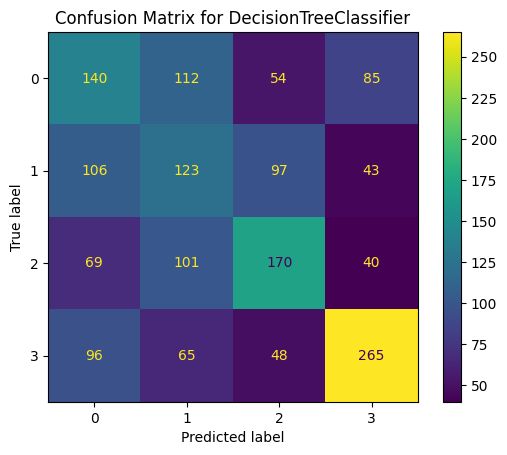

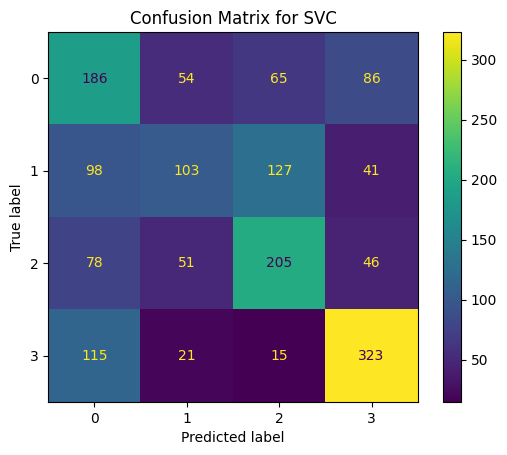

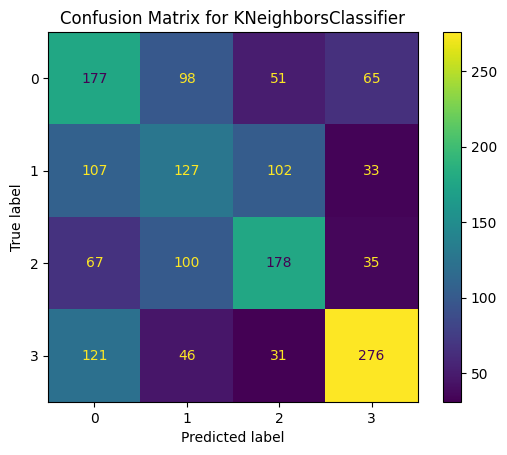

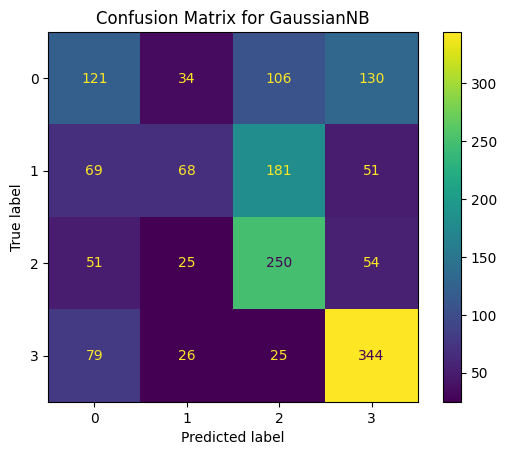

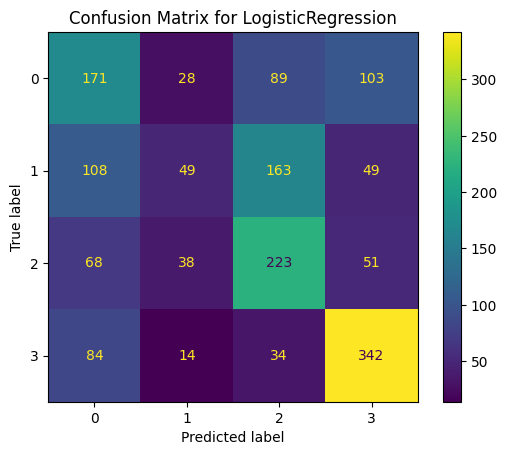

In [36]:
#models = [dt,svc,knn,nb,lr]
for i,y_preds in enumerate(preds):
    evaluate_model(predictions = y_preds, name = str(models[i]).split('()')[0])

# Quick Recap

`Things We did in this notebook`

1. Cleaned the dataset
2. Preprocessed the dataset into numerical data

    a.Split the data into Training and testing dataset
    
    b. Performed normalization
3. Trained 5 machine learning models : Decision Tree, Support Vector Machine, Logitsic Regression, Gaussian Naive Bayes, KNearestNeighbor
4. Evaluated the ML models

The best model so far is **SVM** model with 51% accuracy and 50% percision.

# Improving our best model
Support Vector Machine's SVC has parameters inside its classifier.

We can adjust it to improve our classification results
base SVC model parameters: [link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [37]:
svm = SVC()
svm.fit(X_train,y_train)

svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [38]:
# use GridSearchCV to obtain best parameters
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'C': [1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svm = SVC()
clf = GridSearchCV(svm,param_grid)
clf.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [39]:
clf.best_estimator_,clf.best_score_,clf.best_params_

(SVC(C=100, gamma=0.001),
 0.49132203267703056,
 {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'})

In [40]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.738352,0.013417,0.381025,0.009159,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.437645,0.439969,0.433772,0.416731,0.422481,0.430120,0.008995,4
1,1.860643,0.010237,0.390162,0.015048,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.277304,0.278079,0.278079,0.278079,0.278295,0.277967,0.000342,6
2,1.443663,0.006003,0.343805,0.001095,10,0.001,rbf,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",0.494191,0.484895,0.492641,0.477149,0.468217,0.483419,0.009733,3
3,1.743450,0.008438,0.376983,0.001452,10,0.0001,rbf,"{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}",0.436871,0.439969,0.433772,0.417506,0.422481,0.430120,0.008642,4
4,1.378372,0.038177,0.336093,0.006578,100,0.001,rbf,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",0.491867,0.488768,0.500387,0.491867,0.483721,0.491322,0.005423,1
5,1.377815,0.027705,0.347630,0.004905,100,0.0001,rbf,"{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}",0.494191,0.485670,0.491867,0.477924,0.468217,0.483574,0.009525,2


In [41]:
# Obtained the best SVM SVC with Grid Search
best_param_svm = clf.best_estimator_
best_param_svm.fit(X_train,y_train)

SVC(C=100, gamma=0.001)

# Testing with test.csv

- Import test.csv 
- Clean it 
- Preprocess it to same type of data
- Normalize it
- Make predictions with the model

In [42]:
test = pd.read_csv('/kaggle/input/customer-segmentation/Test.csv')
test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


In [43]:
test.duplicated().sum()

0

In [44]:
test.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64

In [45]:
#filling the missing data for married, profession, family size and var 1
#filling the missing Work_Experience data
test['Ever_Married'].fillna(method='ffill',inplace=True)
test['Work_Experience'] = test['Work_Experience'].fillna(method='ffill')
test['Var_1'] = test['Var_1'].fillna(method='ffill')
test['Family_Size'] = test['Family_Size'].fillna(method='ffill')
test['Graduated'] = test['Graduated'].fillna(method='ffill')
test['Profession'] = test['Profession'].fillna(method='ffill')

In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2627 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2627 non-null   object 
 5   Profession       2627 non-null   object 
 6   Work_Experience  2627 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2627 non-null   float64
 9   Var_1            2627 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB


In [47]:
# Change gender to numeric data
def change_gender(gender):
    if gender == 'Male':
        return 1
    else:
        return 0
test['Gender'] = test['Gender'].apply(change_gender)

# label encoder for spending score and Var_1
categorical_features = ['Ever_Married','Graduated','Profession','Spending_Score','Var_1']
for i in categorical_features[-3:]:
    le = LabelEncoder()
    y = le.fit_transform(test[i])
    test[i] = y
test.head()
# change married and graduated data into numeric using lambda function
for i in categorical_features[0:2]:
    test[i] = test[i].apply(lambda x: 1 if x=='Yes' else 0)
test.head()


categorical_features = ['Ever_Married','Graduated','Profession','Spending_score','Var_1']
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,0,1,36,1,2,0.0,2,1.0,5,B
1,458994,1,1,37,1,5,8.0,0,4.0,5,A
2,458996,0,1,69,0,5,0.0,2,1.0,5,A
3,459000,1,1,59,0,4,11.0,1,2.0,5,B
4,459001,0,0,19,0,8,11.0,2,4.0,5,A


In [48]:
test.drop('ID',axis=1,inplace=True)
test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,1,36,1,2,0.0,2,1.0,5,B
1,1,1,37,1,5,8.0,0,4.0,5,A
2,0,1,69,0,5,0.0,2,1.0,5,A
3,1,1,59,0,4,11.0,1,2.0,5,B
4,0,0,19,0,8,11.0,2,4.0,5,A


In [49]:
test_features = test.drop('Segmentation',axis=1)
test_labels = test['Segmentation']

test_features = scaler.transform(test_features)

In [50]:
predictions = best_param_svm.predict(test_features)
predictions

array(['A', 'C', 'A', ..., 'A', 'C', 'D'], dtype=object)

## Evaluate the best SVM model's results

In [51]:
print(classification_report(test_labels,predictions))

              precision    recall  f1-score   support

           A       0.34      0.38      0.36       846
           B       0.22      0.04      0.06       550
           C       0.24      0.39      0.30       472
           D       0.43      0.45      0.44       759

    accuracy                           0.33      2627
   macro avg       0.31      0.32      0.29      2627
weighted avg       0.32      0.33      0.31      2627



In [52]:
cm = confusion_matrix(test_labels,predictions)
cm

array([[323,  35, 234, 254],
       [217,  20, 185, 128],
       [186,  21, 186,  79],
       [229,  16, 171, 343]])

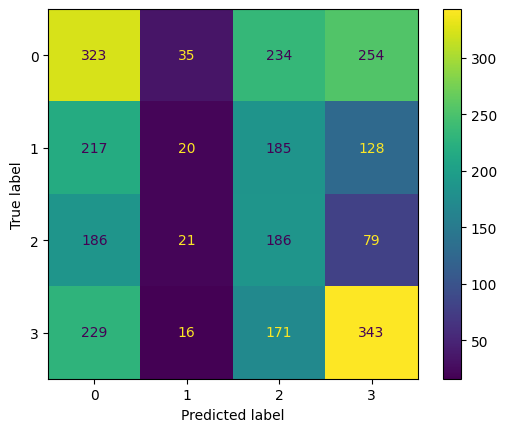

In [53]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()

# Conclusion

I cleaned the training dataset, preprocessed it to numeric data types,split into 80% training, 20% testing dataset, normalized the features, made **5 machine learning models**: Decision Tree, Naive Nayes, K Nearest Neighbors, Logistic Regression and Support Vector Machine.
Of the 5 models, **SVM** obtained the best accuracy. Therefore, I hyper tuned SVM using GridSearch.
Using the best parameters, I imported the testing dataset, prepared it the same way I did the training dataset and applied the best SVM model on it.

Unfornately, the results didn't do so well, producing an accuracy of 33% and weighted precsion of 0.31. 

Way to have improved the model is by not splitting the training set into train & test set again and simply use the GridSearchCV to find best params. This notebook was aimed to show the beginner way of performing data cleaning, data preprocessing and machine learning. 

I hope everyone this notebook. Please leave a comment if you enjoyed it. Follow my kaggle page for more notebooks like this.
Cheers.